<a href="https://colab.research.google.com/github/JeanetteTsehla/Unsupervised-learning-2207FTDS-Team-JM2/blob/main/Unsupervised_learning_2207FTDS_Team_JM2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Learning

#  Predict Overview : EDSA Movie Recommendation 2024 #

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

#### **Problem statement**

In this project, we are challenged to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |

---

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357249 sha256=59244e69d2ada6544c2c2d6d2237601cab63b527b594ebaeea3c417d3a98753f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
pip install wordcloud

In [3]:
pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [4]:
# Libraries for data loading, data manipulation and data visulisation
# Libraries for data preparation and model building
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud

from surprise import Dataset
from surprise import Reader, SVD, accuracy
from surprise.model_selection import train_test_split

from surprise import KNNWithMeans
from surprise import BaselineOnly
from surprise import NMF
from surprise import KNNBasic
from surprise import SVDpp
from surprise import CoClustering

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('white')
%matplotlib inline

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |


---

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

genome_scores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/genome_scores.csv')
genome_tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/genome_tags.csv')
imdb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_data.csv')
links = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.csv')
tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tags.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |


---


### 3.1) Non - Graphical Exploratory Data Analysis

### 3.1.1) Univariate Analysis

In [7]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
train.shape

(10000038, 4)

In [9]:
test.shape

(5000019, 2)

In [10]:
train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [11]:
train.drop('timestamp', axis= 'columns', inplace = True)
train.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


##### Displaying the head of the movies dataset

In [12]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Displaying the head of the imdb_data dataset

In [13]:
imdb_data.head(5)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


Checking for the sum of null values in the training dataset

In [14]:
train.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

Displaying the columns in the movies dataset

In [15]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

Displaying the columns in the genome_scores dataset

In [16]:
genome_scores.columns

Index(['movieId', 'tagId', 'relevance'], dtype='object')

Displaying the columns in the genome_tags dataset

In [17]:
genome_tags.columns

Index(['tagId', 'tag'], dtype='object')

Displaying the columns in the imdb_data dataset

In [18]:
imdb_data.columns

Index(['movieId', 'title_cast', 'director', 'runtime', 'budget',
       'plot_keywords'],
      dtype='object')

Displaying the columns in the links dataset.


In [19]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Checking for duplicated entries in the columns of the training set.

In [20]:
train.duplicated(['userId','movieId','rating'])

0           False
1           False
2           False
3           False
4           False
            ...  
10000033    False
10000034    False
10000035    False
10000036    False
10000037    False
Length: 10000038, dtype: bool

Finding the mode of the training set.

In [21]:
train.mode()

,userId,movieId,rating
0,72315,318,4.0


Investigating the Skewness in the columns of the training set.

Skew will indicate how symmetrical our data is. Below is a table that explains the range of values with regards to skew.



|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  |
| 0.5 < x < 1             | Moderate Positive Skew  |
|       x < -1     |High Negative Skew  |
|       x > 1  |High Positve Skew |


In [22]:
train.skew()

userId     0.007477
movieId    2.200436
rating    -0.703118
dtype: float64

Displaying the kurtosis in the columns of the training set

Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.

In [23]:
train.kurtosis()

userId    -1.197634
movieId    4.351014
rating     0.221102
dtype: float64

In [24]:
train_movie_merge = pd.merge(train,movies, on='movieId')
train_movie_merge.head(5)

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [25]:
ratings=pd.DataFrame(train_movie_merge.groupby('title')['rating'].mean())
ratings.head(5)

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [26]:
ratings['num of ratings']=pd.DataFrame(train_movie_merge.groupby('title')['rating'].count())
ratings.head(5)

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


MOST RATED MOVIE:

In [27]:
ratings.sort_values('num of ratings', ascending=False).head(15)

,rating,num of ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014
Star Wars: Episode IV - A New Hope (1977),4.111811,27560
Jurassic Park (1993),3.684634,25518
Schindler's List (1993),4.247625,24004
Braveheart (1995),3.994119,23722


From above, we can see that Shawshank Redemption, The (1994) is the movie with the highest number of rates.

### 3.1.2) Multivariate Analysis

We will only use the correlation to do multivariate analysis between features. Correlation is just a measure of the degree to which two variables change together, that's if they do at all.

If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.

In [28]:
train.corr()

,userId,movieId,rating
userId,1.000000,-0.00427,0.002202
movieId,-0.004270,1.00000,-0.008940
rating,0.002202,-0.00894,1.000000


In [29]:
genome_scores.corr()

,movieId,tagId,relevance
movieId,1.000000e+00,-1.390078e-13,0.015355
tagId,-1.390078e-13,1.000000e+00,0.017763
relevance,1.535521e-02,1.776320e-02,1.000000


### 3.2) Graphical Exploratory Data Analysis

### 3.2.1) Univariate Analysis

Sketching the box plot of the training set

Text(0.5, 1.0, 'Box plot of rating')

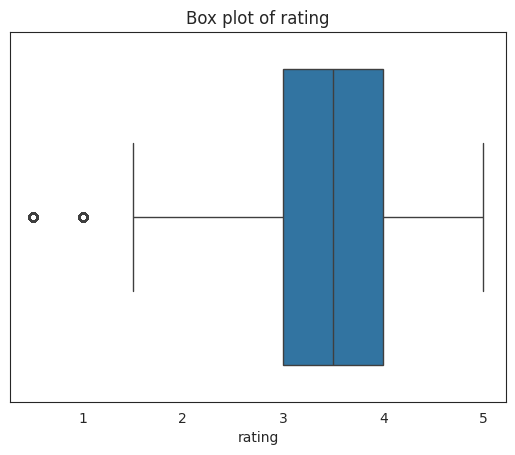

In [30]:
sns.boxplot(x='rating', data=train)
plt.title("Box plot of rating")

Sketching the box plot of movieId

Text(0.5, 1.0, 'Box plot of userId')

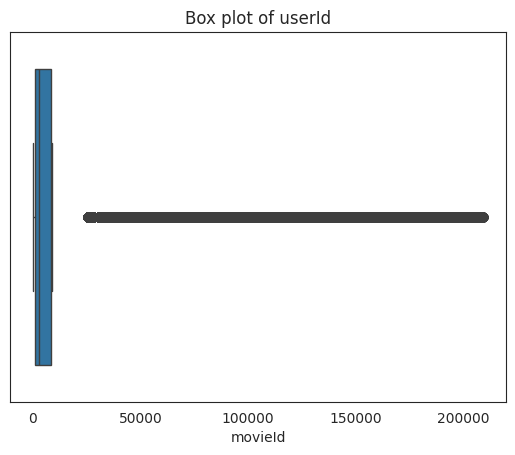

In [31]:
sns.boxplot(x='movieId', data=train)
plt.title("Box plot of userId")

Sketching the box plot of movieId

Text(0.5, 1.0, 'Box plot of userId')

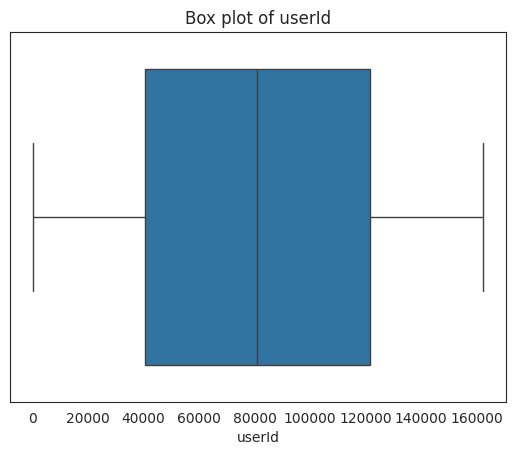

In [32]:
sns.boxplot(x='userId', data=train)
plt.title("Box plot of userId")

The bar graph shows that most movies have a rating of 4 followed by 3 while the least rated movies were rated 0.5 and 1.5. The mean rating is about 3.5 revealing that users tend to give higher ratings to movies in general.

### 3.2.1) Multivariate Analysis

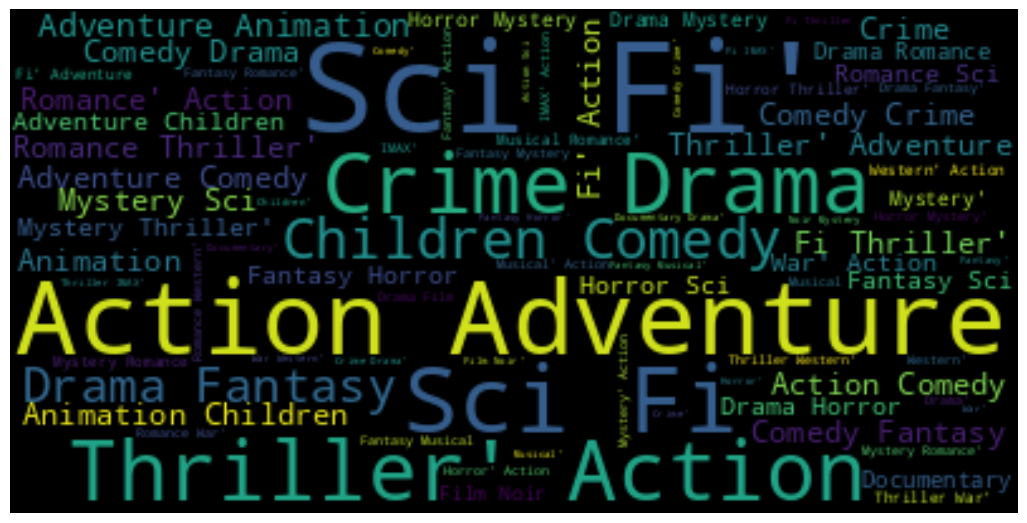

In [34]:
# Let us take a look at a world cloud of the different genres.
gen = movies['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

This visual is showing us different movie genres, with Crime, Drama, Action, Adventure to name a few being the most watched

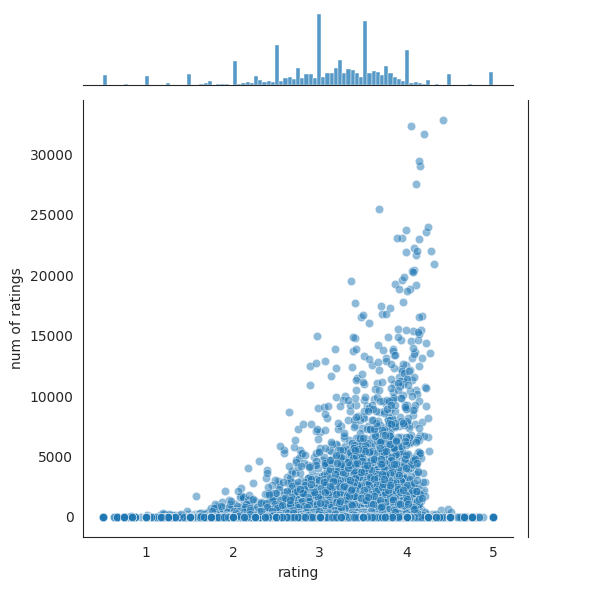

In [35]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

From the above graph, we can see that compared to movies that have lower average ratings, movies with higher average ratings actually have more number of ratings

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |


---

## Checking for missing values

In [36]:
missing_train = pd.DataFrame(train.isnull().sum())
missing_train

,0
userId,0
movieId,0
rating,0


In [37]:
missing_g_scores= pd.DataFrame(genome_scores.isnull().sum())
missing_g_scores

,0
movieId,0
tagId,0
relevance,0


In [38]:
missing_test = pd.DataFrame(test.isnull().sum())
missing_test

,0
userId,0
movieId,0


In [39]:
movies_missing = pd.DataFrame(movies.isnull().sum())
movies_missing

,0
movieId,0
title,0
genres,0


In [40]:
missing_genome_tags = pd.DataFrame(genome_tags.isnull().sum())
missing_genome_tags

,0
tagId,0
tag,0


In [41]:
missing_genome = pd.DataFrame(tags.isnull().sum())
missing_genome

,0
userId,0
movieId,0
tag,16
timestamp,0


In [42]:
missing_imdb  = pd.DataFrame(imdb_data.isnull().sum())
missing_imdb

,0
movieId,0
title_cast,10068
director,9874
runtime,12089
budget,19372
plot_keywords,11078


In [43]:
missing_links = pd.DataFrame(links.isnull().sum())
missing_links

,0
movieId,0
imdbId,0
tmdbId,107


##### Checking for unique users and movieIds in the train data

In [44]:
users = len(train.userId.unique())
items = len(train.movieId.unique())
print('There are {} unique users and {}\
 unique movies train dataset with {} duplicated entries'.format(users, items, train[train.duplicated()].count().sum()))

There are 162541 unique users and 48213 unique movies train dataset with 0 duplicated entries


##### Analysing the percentage of each column of missing values in the imdb_data

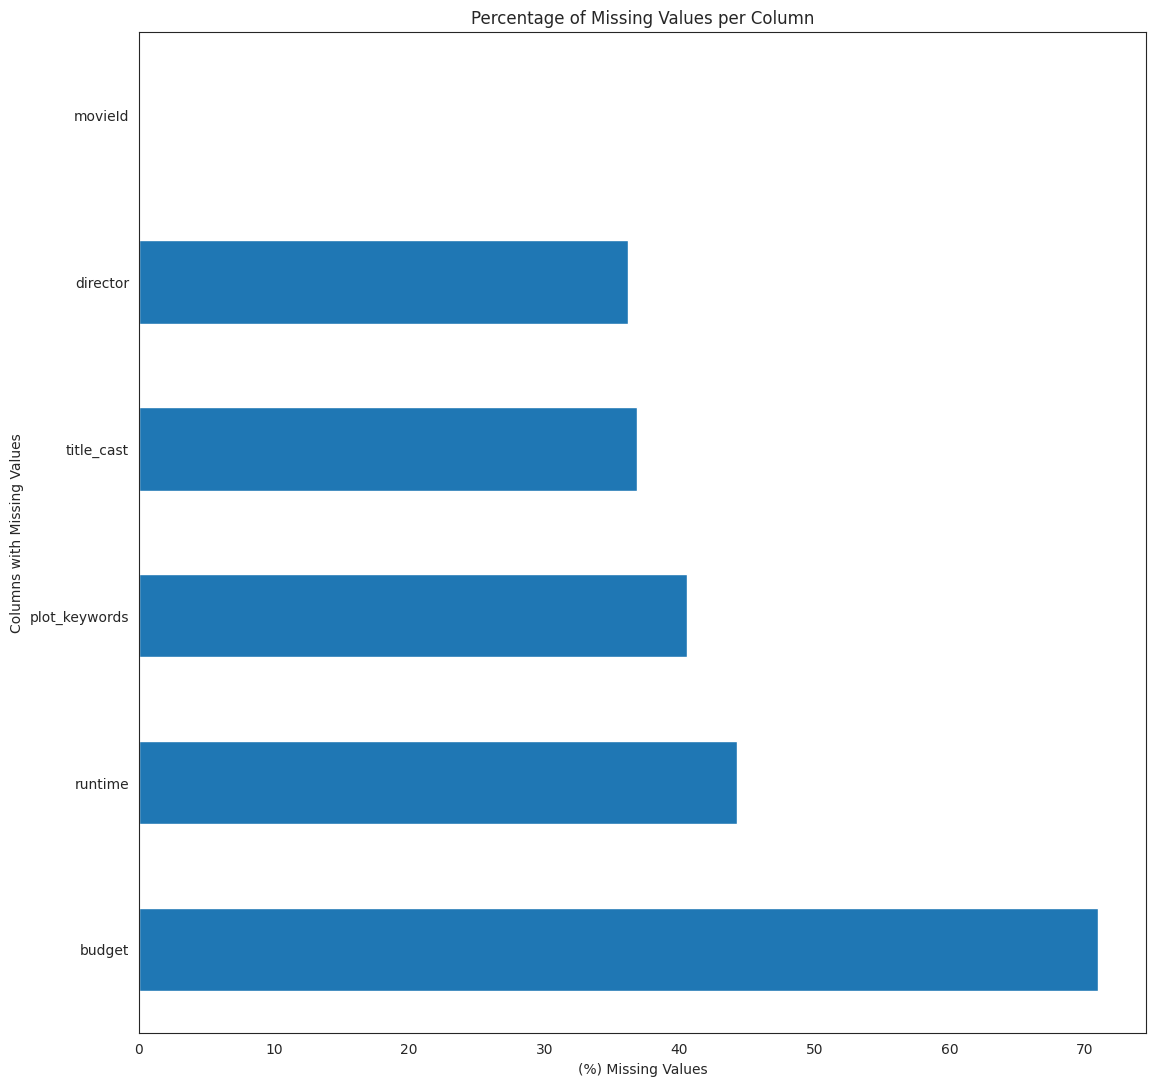

In [45]:
total = imdb_data.isnull().sum().sort_values(ascending=False)
percent_1 = imdb_data.isnull().sum()/imdb_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='barh')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

##### Merging of the train and movies datasets to get clear analysis.

In [46]:
# Combining both train and movies datasets by using movieId
# as the matching column between both datasets
train_movies_df = pd.merge(train,
                           movies,
                           how='left',
                           on='movieId')

# Combining all the observations in movies_metadata_df with imdb_data
# using movieId as the matching column between both dataframes
movies_metadata_df = pd.merge(train_movies_df,
                              imdb_data,
                              how='left',
                              on='movieId')

movies_metadata_df.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...


##### Calculating the mean rating per movie

In [47]:
movies_ranking = movies_metadata_df[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)
movies_ranking.head()

,rating
title,
Which Way Home (2009),5.0
Kaakha Kaakha (2003),5.0
Not Quite Human II (1989),5.0
Selling Isobel (2018),5.0
Sehar (2005),5.0


The bar graph above shows that most movies have a rating of 4 followed by 3 while the least rated movies were rated 0.5 and 1.5. The mean rating is around 3.5 revealing that users tend to give higher ratings to movies in general.

In [50]:
movies_ranking['No_of_ratings'] = movies_metadata_df.groupby('title')['rating'].count()

In [51]:
movies_ranking.sort_values(by=['No_of_ratings', 'rating'],
                          ascending=False).head()

,rating,No_of_ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014


The table above shows that the best movies are those with high number of ratings as they have been rated highly by large quantities of people.

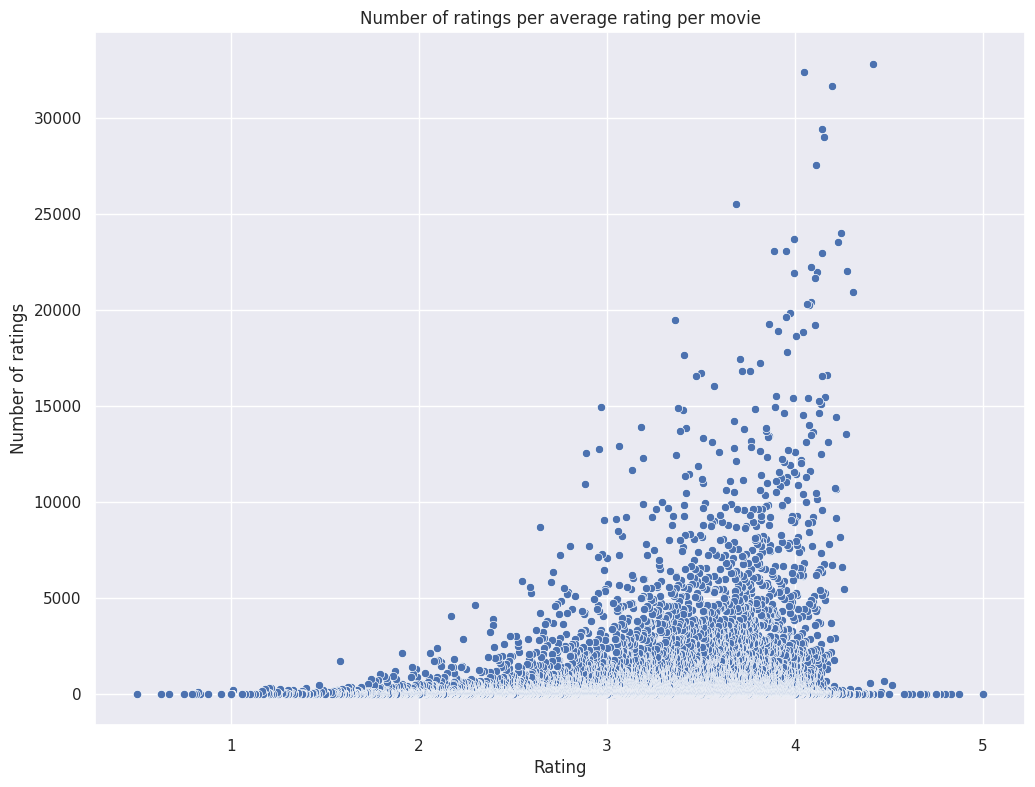

In [52]:
# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

# Plot Number of rating for every rating category.
sns.scatterplot(x='rating', y='No_of_ratings', data=movies_ranking)
plt.title('Number of ratings per average rating per movie')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()


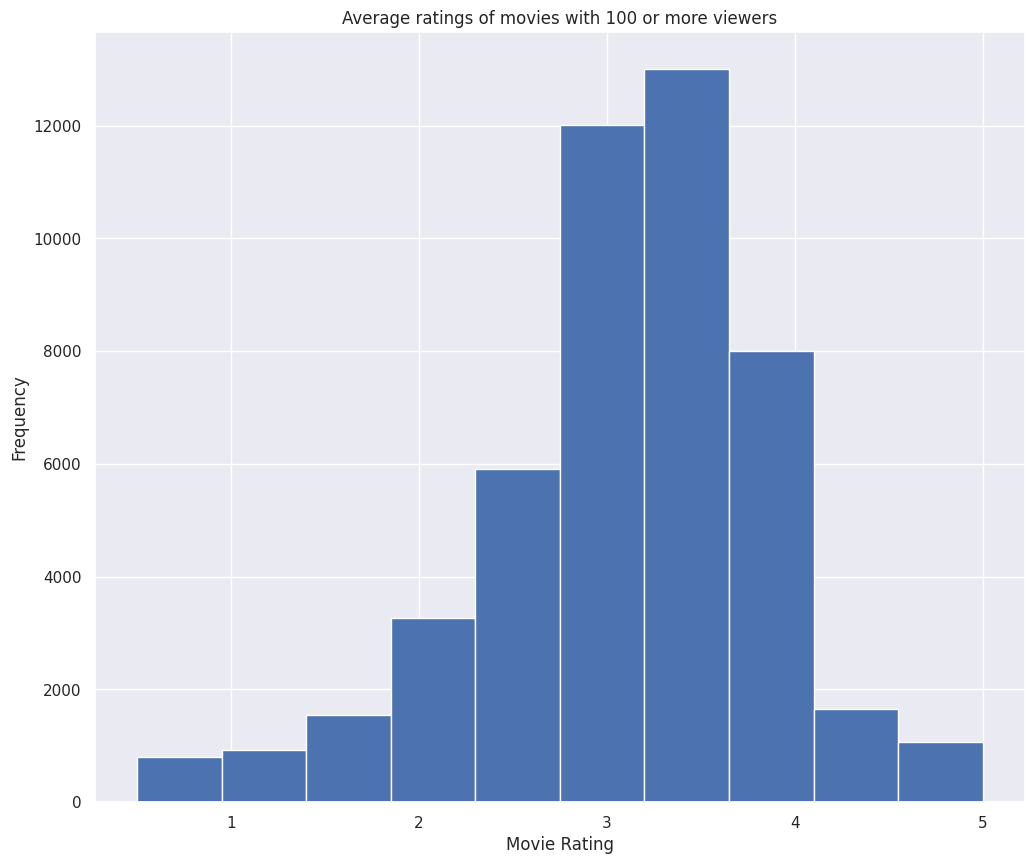

In [53]:
# Average rating of movies in the dataset
avg_rating = train.groupby('movieId')['rating'].mean()

# Plotting the results
plt.figure(figsize=(12,10))
avg_rating.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Movie Rating')
plt.title('Average ratings of movies with 100 or more viewers')
plt.show()

In [54]:
best_director = pd.DataFrame(movies_metadata_df.groupby('director')['rating'].mean().
                             sort_values(ascending=False))
best_director['No_of_ratings'] = movies_metadata_df.groupby('director')['rating'].count()
best_director.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head(10)

,rating,No_of_ratings
director,,
Quentin Tarantino,3.936571,109919
Michael Crichton,3.273370,65157
J.R.R. Tolkien,4.080118,62963
Lilly Wachowski,3.808348,60988
Stephen King,4.049956,59903
Ethan Coen,3.947250,51185
James Cameron,3.687102,51178
Luc Besson,3.749676,44015
Jonathan Nolan,4.100516,42645


In the table above, we look at average rating for individual movie directors. From the resulting dataframe it is clear that certian directors like Quentin Tarantino, Lilly Wachowski, and Stephen Kind have both higher-than-average average ratings AND higher numbers of ratings (views).

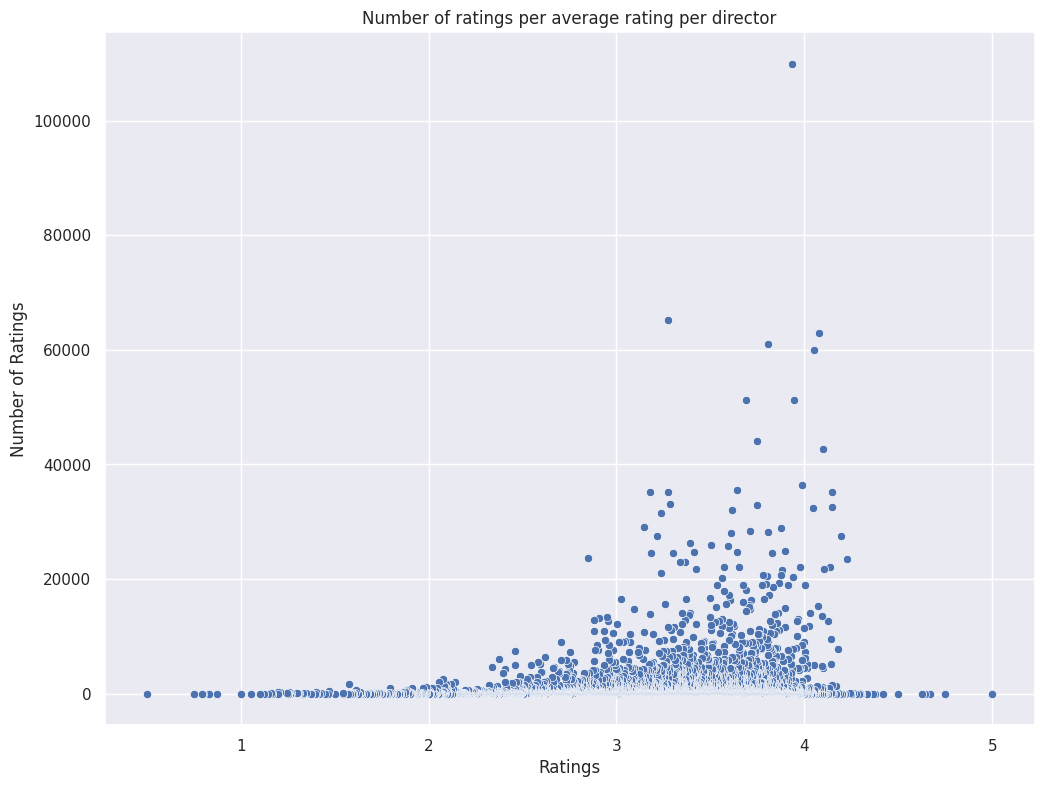

In [55]:
# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(x = 'rating', y = 'No_of_ratings', data = best_director).set_title('Number of ratings per average rating per director')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

The plot above shows the distribution of ratings for directors, extending the positive correclation between 'number of ratings' and 'rating' to 'directors' as well.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :-------------------------|

---

The following are the models that we used:

1. Singular value decomposition(SVD)
2. Baselineonly
3. Co Clustering
4. Non-negative Matrix Factorization

In [56]:
reader = Reader()
ratings = Dataset.load_from_df(train,reader)

Before anything we have to split our data. This allow us to evaluate our model performance and chose the best model to use for our submission

In [57]:
#Separating our dataset into training(80%) and  validation(20%) for model training
trainset, testset = train_test_split(ratings, test_size = 0.20)

**1. SVD MODEL**

Singular value decomposition(SVD) is a collaborative filtering method for movie recommendation.

In [58]:
#Creating a SVD Model
svd_model = SVD()

#Fitting the model
svd_model_trained = svd_model.fit(trainset)

In [59]:
#Making a prediction
pred1 = svd_model_trained.test(testset)
accuracy.rmse(pred1)

RMSE: 0.8330


0.8330080871967422

In [60]:
pred = [svd_model.predict(test.userId[i],test.movieId[i]).est for i in test.index]
predictions = pd.DataFrame(pred)
predictions['Id'] = test['userId'].astype(str)+'_'+ test['movieId'].astype(str)

In [61]:
import pickle

model_save_path = "SVD.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svd_model_trained,file)

**2. Baselineonly Model**

A baseline is a method that uses simple summary statistics, randomness, or machine learning to create predictions for a dataset.

In [62]:
#Creating a Baselineonly Model
base = BaselineOnly()

#Fitting the model
base_model_trained = base.fit(trainset)

Estimating biases using als...


In [63]:
#Making a prediction
pred2 = base_model_trained.test(testset)
accuracy.rmse(pred2)

RMSE: 0.8664


0.8663840571194723

**3. Co Clustering**

In this algorithm, users and items are classified into different clusters and co-clusters.

In [64]:
#Creating a co clustering model
CC=CoClustering()

#Fitting the model
CC_model_trained= CC.fit(trainset)

In [65]:
#making a prediction
pred3 = CC_model_trained.test(testset)
accuracy.rmse(pred3)

RMSE: 0.8968


0.8967616086389921

**4. Non-negative Matrix Factorization(NMF)**

NMF is an unsupervised algorithm that projects data into lower dimensional spaces, effectively reducing the number of features while retaining the basis information necessary to reconstruct the original data

In [66]:
#Creating a NMF Model
nmf= NMF()

#Fitting the model
nmf_model_trained=nmf.fit(trainset)

In [67]:
#Making a prediction
pred4= nmf_model_trained.test(testset)
accuracy.rmse(pred4)

RMSE: 0.8837


0.883657485365766

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>


---
    
  
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
|

---

The perfomance of each model will be evaluated based on the Root Mean Square Error also known as RMSE achieved when the model was used to predict the classes for the validation data. Root Mean Square Error is the standard deviation of the residuals.

In [68]:
model_performance = {'RMSE':
                     {'SVD':accuracy.rmse(pred1),
                      'Baselineonly':accuracy.rmse(pred2),
                      'CoClustering':accuracy.rmse(pred3),
                      'NFM':accuracy.rmse(pred4) }}
model_performance= pd.DataFrame(data=model_performance)
model_performance
model_performance.sort_values('RMSE', ascending = True)

RMSE: 0.8330
RMSE: 0.8664
RMSE: 0.8968
RMSE: 0.8837


,RMSE
SVD,0.833008
Baselineonly,0.866384
NFM,0.883657
CoClustering,0.896762


The following graph shows the performance of each model, with SVD having the lowest RSME of 0.83 and CoClustering having the highest RSME of 0.91.

In [69]:
px.bar(model_performance, y= model_performance['RMSE'],
     color= model_performance.index, width = 500, height = 400)

With **RMSE**, the lower it is the better. Therefor, out of all the trained models SVD is the best performing model since it has the lowest RMSE. To improve our best model performance, we tuned it. The combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [70]:
# Modelling of the SVD hypertuning
svd_hyper = SVD(n_factors=10,
                     lr_all=0.0085,
                     n_epochs=22,
                     init_std_dev=0.01)
svd_hyper.fit(trainset)

# Predicting on the validation set
svd_hyper_predictions = svd_hyper.test(testset)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

RMSE: 0.8148
RMSE: 0.8148


# Submission

In [71]:
pred = [svd_hyper.predict(test.userId[i],test.movieId[i]).est for i in test.index]

In [ ]:
pred = [svd_hyper.predict(test.userId[i],test.movieId[i]).est for i in test.index]
predictions = pd.DataFrame(pred)
predictions['Id'] = test['userId'].astype(str)+'_'+ test['movieId'].astype(str)

In [ ]:
submission=pd.DataFrame()
submission['Id']=predictions['Id']
submission['rating']=predictions[0]
submission.to_csv('svdtuned.csv', index=False)

In [ ]:
from google.colab import files

# Downloading the CSV file
files.download('svdtuned.csv')

## Conclusion

Recommender systems generally make life easier with the amount of information to choose from out there, it is difficult as a consumer to choose which movie to consume. With this app everything is made easy for you. Our business is the app service model that offers personalised recommendations, to help you find movies of interest to you.

To do this we have created a proprietary, app recommendations system.
It has basics Whenever you access the app our system strives to help you find a movie to enjoy with minimal effort.

Our recommender system inclused working with numerous data, with ease.Using both collaboartive an content, the system considers collaboartive data without relying on it
